Load Titanic Dataset

In [1]:
import pandas as pd

data = pd.read_csv("titanic-dataset.csv")
data.info()
print("This is the original Dataset of Titanic")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
This is the original Dataset of Titanic


Data cleaning

In [2]:
missing_value = data.isnull().sum()
missing_value

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

With more details

In [3]:
percentage = data.isnull().mean() * 100
percentage

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

now we know the Age column is usefull becouse ~20% data is missing we use sklearn simple imputer to transform Age column 
this is for just practice purposes only, if we want model performance for serious problem then that ~20% data most
impotantent for that problem, we should drop cabin column becouse we have just ~33% data and missing ~77% of cabin column
this is for we should drop cabin column, 

In [4]:
from sklearn.impute import SimpleImputer

# For numerical columns
n_imputer = SimpleImputer(strategy='mean')
data['Age'] = n_imputer.fit_transform(data[['Age']]).ravel()

# for catagorical column
c_imputer = SimpleImputer(strategy='most_frequent')
data['Embarked'] = c_imputer.fit_transform(data[['Embarked']]).ravel()

data.drop(columns=['Cabin'], axis=1, inplace=True)
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

now the titanic dataset is clean let's start data exploration (EDA)

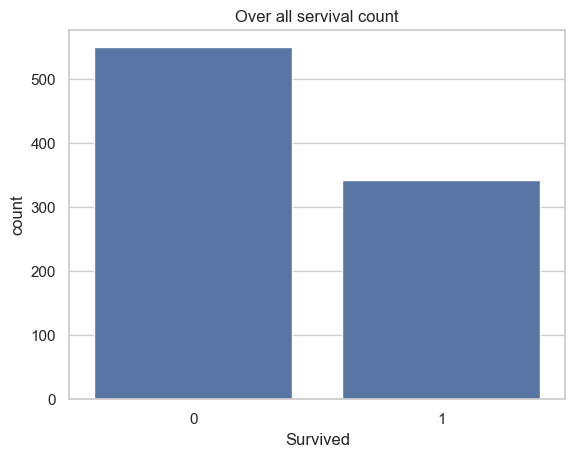

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='whitegrid')

sns.countplot(x='Survived', data=data)
plt.title('Over all servival count')
plt.show()

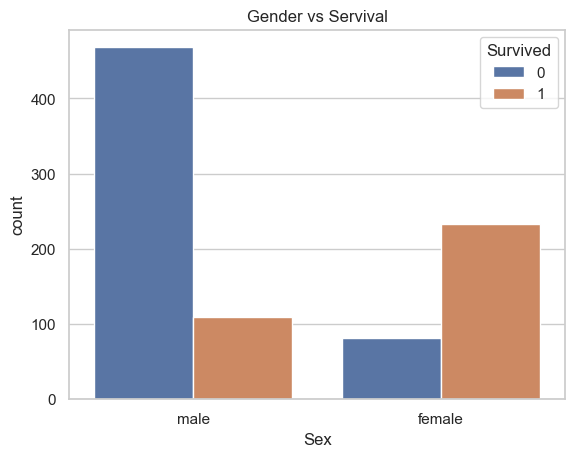

In [6]:
sns.countplot(x='Sex', hue='Survived', data=data)
plt.title('Gender vs Servival')
plt.show()

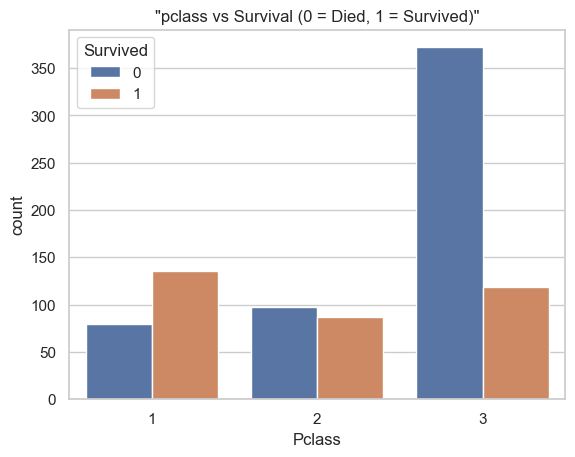

In [7]:
sns.countplot(x='Pclass', hue='Survived', data=data)
plt.title('"pclass vs Survival (0 = Died, 1 = Survived)"')

plt.show()

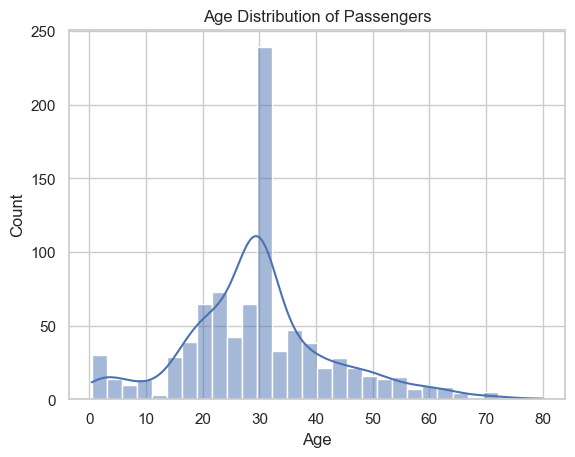

In [8]:
sns.histplot(data['Age'], bins=30, kde=True)
plt.title("Age Distribution of Passengers")
plt.show()

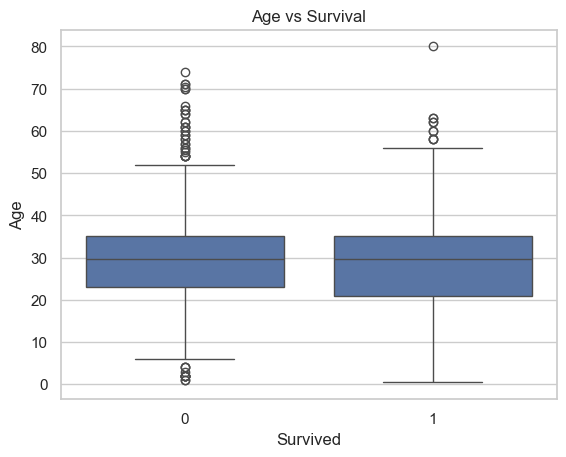

In [9]:
sns.boxplot(x='Survived', y='Age', data=data)
plt.title("Age vs Survival")
plt.show()

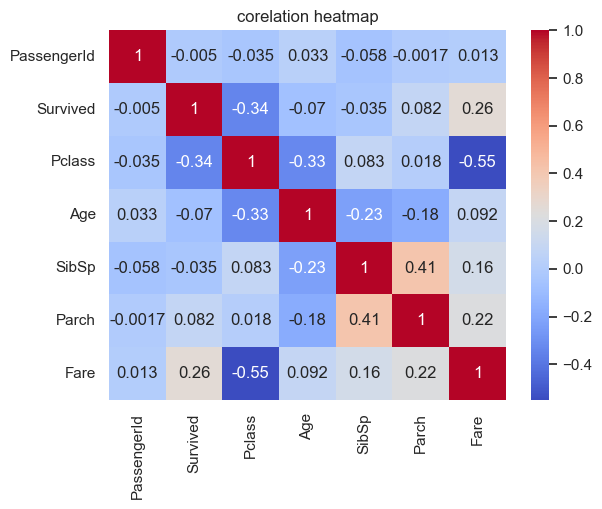

In [10]:
corr = data.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('corelation heatmap')
plt.show()

The Titanic dataset revealed an important pattern: the 'Fare' feature influences several other features. This indicates that wealthier passengers had a higher chance of survival, while poorer passengers were less likely to survive

Now the time is to split data into train_set valid_set and test_set before we start feature engineering

In [11]:
from sklearn.model_selection import train_test_split

X = data.drop(columns='Survived')
y = data.Survived

# first split
X_train, X_tem, y_train, y_tem = train_test_split(
    X, y, test_size=0.3, random_state=0, stratify=y
)
# second split
X_test, X_val, y_test, y_val = train_test_split(
    X_tem, y_tem, test_size=0.5, stratify=y_tem
)
print(f"X train size:{X_train.shape} y train size{y_train.shape}")
print(f"X val size:  {X_val.shape}   y val size{y_val.shape}")
print(f"X test size: {X_test.shape}  y test size{y_test.shape}")

X train size:(623, 10) y train size(623,)
X val size:  (134, 10)   y val size(134,)
X test size: (134, 10)  y test size(134,)


Let's Start Feature Engineering

In [12]:
def feature_engineering(data_):
    data_ = data_.copy() # avoid modifying original
    
    
    data_['faimily_size'] = data_["SibSp"] + data_["Parch"] + 1
    data_['IsAlone'] = 0
    data_.loc[data_['faimily_size'] ==1,'IsAlone'] = 1

    data_['Title'] = data_['Name'].str.extract('([A-Za-z]+)\.', expand=False)

    data_['Title'] = data_['Title'].replace(['Lady', 'Countess','Capt','Col','Don','Dr',
                                   'Major','Rev','Sir','Jonkheer','Dona'], 'Rare')

    data_['Title'] = data_['Title'].replace({'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs'})

    data_['Ageband'] = pd.cut(data_['Age'], bins=[0, 16, 32, 48, 64, 80], labels=False)

    data_['Fareband'] = pd.cut(data_['Fare'], 4 , labels=False)

    data_['Sex'] = data_['Sex'].map({'male': 0, 'female': 1}).astype(int)

    data_['Embarked'] = data_['Embarked'].map({'S':0, 'C': 1, 'Q': 2}).astype(int)

    data_['Title'] = data_['Title'].map({'Mr': 0, 'Miss': 1, 'Mrs': 2, 'Master': 3, 'Rare': 4}).astype(int)
    
    data_ = data_.drop(columns=['Name', 'SibSp', 'Parch', 'Ticket', 'Age', 'Fare', 'PassengerId'])
    
    return data_

<>:9: SyntaxWarning: invalid escape sequence '\.'
<>:9: SyntaxWarning: invalid escape sequence '\.'
C:\Users\Dell E6440\AppData\Local\Temp\ipykernel_12916\4032799377.py:9: SyntaxWarning: invalid escape sequence '\.'
  data_['Title'] = data_['Name'].str.extract('([A-Za-z]+)\.', expand=False)


Apply Feature engineering on X_train X_val and X_test

In [13]:
X_train = feature_engineering(X_train)
X_val = feature_engineering(X_val)
X_test = feature_engineering(X_test)

X_train.head()

,Pclass,Sex,Embarked,faimily_size,IsAlone,Title,Ageband,Fareband
231,3,0,0,1,1,0,1,0
836,3,0,0,1,1,0,1,0
639,3,0,0,2,0,0,1,0
389,2,1,1,1,1,1,1,0
597,3,0,0,1,1,0,3,0


now we are ready for model building, first we'll try simple 5 models
withoud hyperperameter and evaluate them and then we'll try to tune hyperperameters

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score


models = {
    'Random Forest': RandomForestClassifier(),
    'Decision tree': DecisionTreeClassifier(),
    'logistic Regression' : LogisticRegression(max_iter=1000),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    # Accuracy Score
    acc = accuracy_score(y_val, y_pred)
    cv_score = cross_val_score(model, X_train, y_train, cv=5)
    
    # Save results
    results[name] = {
        'Validation Accuracy': acc,
        'Cross-Validation Mean': cv_score.mean(),
        'Cross-Validation Std' : cv_score.std()
    }
    
# Display results
for name, score in results.items():
    print(f"\n{name}")
    print(f"  ✅ Validation Accuracy: {score['Validation Accuracy']:.4f}")
    print(f"  📊 CV Accuracy: {score['Cross-Validation Mean']:.4f} ± {score['Cross-Validation Std']:.4f}")

c:\Users\Dell E6440\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:00:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Dell E6440\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:00:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Dell E6440\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:00:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Dell E6440\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:00:2


Random Forest
  ✅ Validation Accuracy: 0.7687
  📊 CV Accuracy: 0.7945 ± 0.0134

Decision tree
  ✅ Validation Accuracy: 0.8060
  📊 CV Accuracy: 0.7978 ± 0.0293

logistic Regression
  ✅ Validation Accuracy: 0.8582
  📊 CV Accuracy: 0.7962 ± 0.0164

XGBoost
  ✅ Validation Accuracy: 0.8358
  📊 CV Accuracy: 0.7977 ± 0.0165


c:\Users\Dell E6440\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:00:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Model tuning and finding best hyperperameter

In [15]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV

# # Define parameter grid
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 5, 10],
#     'min_samples_split': [2, 5, 10]
# }

# # Create model
# rf = RandomForestClassifier(random_state=42)

# # Grid Search with 5-fold CV
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
#                            cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# # Fit on training data
# grid_search.fit(X_train, y_train)

# # Best model
# best_rf = grid_search.best_estimator_

# # Show best params and accuracy
# print("🔥 Best Parameters:", grid_search.best_params_)
# print("✅ Best Cross-Validation Accuracy:", grid_search.best_score_)

# # Test on validation set
# val_pred = best_rf.predict(X_val)
# val_acc = accuracy_score(y_val, val_pred)
# print("📊 Validation Accuracy with Best Model:", val_acc)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
🔥 Best Parameters: {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 200}
✅ Best Cross-Validation Accuracy: 0.8234193548387096
📊 Validation Accuracy with Best Model: 0.7910447761194029

Final model

In [16]:
from sklearn.ensemble import RandomForestClassifier

# Apply best params manually
final_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=5,
    min_samples_split=5,
    random_state=42
)

# Train on full training data
final_model.fit(X_train, y_train)

# Now use for prediction or deployment:
y_val_pred = final_model.predict(X_val)

Confusion matrix

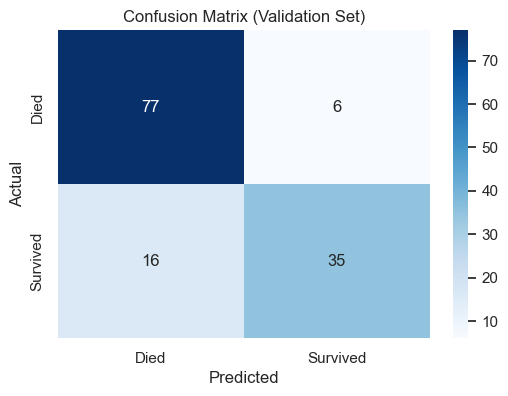

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create confusion matrix
cm = confusion_matrix(y_val, y_val_pred)

# Plot
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Died', 'Survived'], yticklabels=['Died', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Validation Set)')
plt.show()


let's finish and deploy the titanic_classification model

In [18]:
import joblib

# save the final model
joblib.dump(final_model,'titanic_model.pkl')

['titanic_model.pkl']

Create FastAPI App (save as main.py)

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
import joblib
import numpy as np

# Load the model
model = joblib.load('titanic_model.pkl')

# Create app
app = FastAPI()

# Define input schema
class Passenger(BaseModel):
    Pclass: int
    Sex: int
    Ageband: int
    Fareband: int
    Embarked: int
    faimily_size: int
    IsAlone: int
    Title: int

# API route
@app.post("/predict")
def predict(passenger: Passenger):
    data = np.array([[passenger.Pclass, passenger.Sex, passenger.Ageband, passenger.Fareband,
                      passenger.Embarked, passenger.faimily_size, passenger.IsAlone, passenger.Title]])
    
    prediction = model.predict(data)[0]
    result = "Survived" if prediction == 1 else "Died"
    return {"prediction": int(prediction), "result": result}